In [17]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [18]:
data = pd.read_csv("mls_salaries_masterlist.csv")
data

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.00,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.00,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.00,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.00,2022,Western


In [19]:
#Se eliminan los datos NA
data.isna().sum()
data.shape
data = data.dropna()
data.shape

(9382, 8)

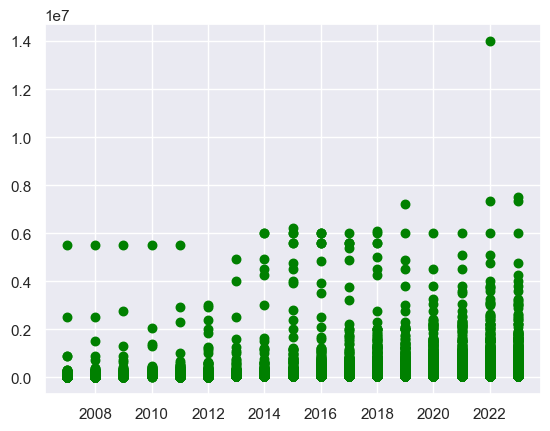

In [20]:
plt.scatter(data["year"], data["base_salary"],
             marker=".", s=150, color="green", label="Western Salaries")

In [28]:
x = data.iloc[:, 4:7]
x

,base_salary,guaranteed_compensation,year
0,46500.0,46500.00,2013
1,46500.0,70500.00,2013
2,46500.0,51500.00,2013
3,46500.0,53166.67,2013
4,145000.0,175000.00,2013
...,...,...,...
10368,500000.0,562500.00,2022
10369,400000.0,449375.00,2022
10370,405000.0,490500.00,2022
10371,556000.0,609997.00,2022


In [45]:
#Objeto Kmeans
#K=4

kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
identified_cluster = kmeans.fit_predict(x)
identified_cluster

c:\Users\becar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\becar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 3, 3, 3])

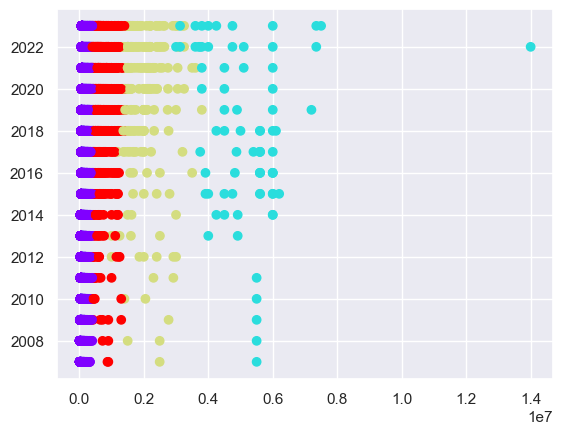

In [46]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_cluster
plt.scatter(data_with_clusters['base_salary'], data_with_clusters['year'], c=data_with_clusters['Clusters'], cmap='rainbow')

In [49]:
#definir region de calculo
h = 1.5
x_min, x_max = min(data['year']), max(data['year'])
y_min, y_max = min(data['base_salary']), max(data['base_salary'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #crear region
stack1 = np.dstack((xx.flatten(), yy.flatten()))[0,:,:]
y_pred = kmeans.predict(stack1) #clusterizar region
vb = y_pred.reshape(np.shape(xx))
plt.pcolormesh(xx, yy, vb, cmap = 'tab20')
plt.scatter(data_with_clusters['base_salary'], data_with_clusters['year'], c=data_with_clusters['Clusters'], cmap='rainbow')

c:\Users\becar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KMeans is expecting 3 features as input.